# Regressão Logistica

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
data = torch.tensor(np.loadtxt('../data/age_data_3.txt'))
x, targets = data.T

# Definição do modelo

Text(0, 0.5, 'P(x=1|x)')

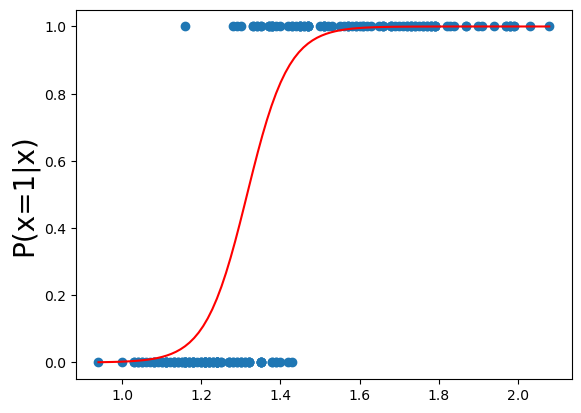

In [3]:
class Model:
    def __init__(self, a, b, requires_grad = False):
        self.a = torch.tensor(a, requires_grad=requires_grad)
        self.b = torch.tensor(b, requires_grad=requires_grad)

    def __call__(self, x):
        y = self.a*x + self.b
        return y
    
    def parameters(self):
        return self.a, self.b
    
    def zero_grad(self):
        for p in self.parameters():
            p.grad = None

def sigmoid(x):
    y = 1/(1+torch.exp(-x))
    return y
model = Model(19., -25.)
scores = model(x)
probs = sigmoid(scores)

xm = torch.linspace(x.min(), x.max(), 100)
scoresm = model(xm)
probsm = sigmoid(scoresm)

plt.scatter(x, targets)
plt.plot(xm, probsm, c='r')
plt.ylabel('P(x=1|x)', size=20)

In [4]:
def accuracy(preds, targes):
    return torch.sum(preds==targets)/len(preds)


preds = probs >0.5
accuracy(preds, targets)

tensor(0.9000)

# Função Verossimilhança e entropia cruzada

In [5]:
def prob_of_target(probs, targets):
    """
    n = len(probs)
    probs_target = torch.zeros(n)
    for idx in range(n):
        prob, target = probs[idx], targets[idx]
        if target == 0:
            probs_target[idx] = 1-prob
        else:
            probs_target[idx] = prob
    return probs_target"""
    return probs*targets + (1-probs) * (1-targets)

def likelihood(probs, targets):
    
    probs_correts = prob_of_target(probs, targets)
    return torch.prod(probs_correts)

def nll(probs, targets):
    probs_corret = prob_of_target(probs, targets)
    prob_log = torch.log(probs_corret)
    return -torch.sum(prob_log)


print(likelihood(probs, targets))
print(nll(probs, targets))

tensor(2.2591e-20, dtype=torch.float64)
tensor(45.2367, dtype=torch.float64)


Entropia cruzada:

Para um modelo ideal:
* Quanto o item é da classe 0, o modelo tem como resultado P(c=0|x)=1
* Quanto o item é da classe 1, o modelo tem como resultado P(c=1|x)=1

A entropia curzada quantifica o quão similar a saída do modelo é em relação ao valor [1, 0] (para a classe 0) e [0, 1]( para a classe 1)

In [6]:
def cross_entropy(scores, targets):

    probs = sigmoid(scores)
    probs_corret = prob_of_target(probs, targets)
    prob_log = torch.log(probs_corret)
    return -torch.mean(prob_log)

print(cross_entropy(scores, targets))

tensor(0.2262, dtype=torch.float64)


# Otimização do modelo

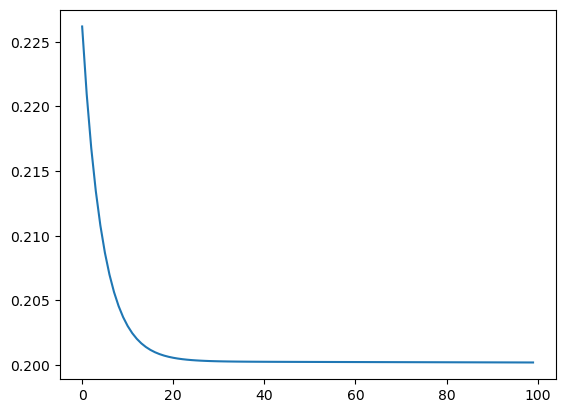

In [7]:
def step(model, x, targets, lr):
    model.zero_grad()
    scores = model(x)
    loss = cross_entropy(scores, targets)
    loss.backward()
    with torch.no_grad():
        for p in model.parameters():
            p -= lr*p.grad
        
    return loss.item()

model = Model(19., -25., True)
num_epochs = 100
lr = 0.5
losses = []
for epoch in range(num_epochs):
    loss = step(model, x, targets, lr)
    losses.append(loss)
plt.plot(losses)